#배달 시간 분석

##1. 배달 시간 데이터 만들기(카톡으로 배포)

In [ ]:
import numpy as np

In [ ]:
food_a = [20,21,23,22,26,28,35,35,41,42,43,45,44,45,46,47,47,46,47,58,58,59,60,56,57,57,80]
food_b = [5,6,11,13,15,16,20,20,21,23,22,27,27,30,30,32,36,37,40,40,43,44,45,51,54,70,600]
food_c = [5,5,5,12,10,11,20,20,20,20,20,21,20,30,32,31,31,31,36,40,40,51,61,51,61,61,70]

##2. 평균 배달 시간 구하기(Quiz)
>평균이라는 것은 "일반적인, 보통의"로 해석할 수 있다. 
* 그 식당 배달 시간이 보통 얼마나 걸려?

> 위와 같은 질문을 받게 된다면 평균 배달 시간을 답변할 것이다. 위의 세 식당에 대한 평균 배달 시간을 알아보자

In [ ]:
food_a_mean = np.mean(food_a)
food_b_mean = np.mean(food_b)
food_c_mean = np.mean(food_c)
print(food_a_mean, '{0:.2f}'.format(food_b_mean), round(food_c_mean, 2))

>실행 결과 c가 평균이 가장 좋아 보인다. B가 가장 늦은 평균 배달 시간을 가지고 있다. 그렇다면 B가 가장 늦게 배달되는 식당일지에 대해 생각해 보자

> B 식당의 최소 배달 시간과 최대 배달 시간을 확인해 보면 최소 배달 시간은 5이지만 최대 배달 시간은 600이다. 시간으로 따지면 최대 배달 시간이 10시간으로 현실적으로 불가능한 수치이다. 식당에 알아보니 주문이 취소된 내용이었는데 데이터를 지우지 않고 가지고 있어 600이 된 것이라고 한다. 결국 이 600분 때문에 평균 수치가 많이 올라가게 되었다.

##3. 중간수 구하기(Quiz)
>위의 내용에서 보았듯이 평균은 데이터 중 잘못된 데이터가 존재한다면 그 그룹을 대표하는 값으로 사용할 수 없게 된다.
이러한 문제를 해결하기 위해 중위수라는 것을 사용할 수 있다.

>중위수는 데이터의 중간에 위치한 값으로 홀수의 경우는 중간 값이 존재하지만 짝수의 경우는 중간 값이 존재할 수 없기 때문에 중간 두 수를 합한 평균을 중위수로 사용한다.

In [ ]:
food_a_median = np.median(food_a)
food_b_median = np.median(food_b)
food_c_median = np.median(food_c)

print(food_a_median, food_b_median, food_c_median)

>위의 결과를 보면 중간값이 45, 30, 30으로 나타난다. 기존에 B 식당에서 600이라는 잘못된 수치로 평균 수치가 올라갔지만 중간값을 이용하면 이러한 문제를 해결할 수 있게 된다.위의 내용을 해석해 보면 A food는 50%미만으로 소요되는 배달 시간이 45분이지만 B, C는 30분 미만인 것을 확인할 수 있다.

##4. 데이터 요약(Quiz)
> series는 1차원 벡터로 내부적으로 describe() 함수를 지원한다. 이 함수는 객체수(count), 평균(mean), 표준편차(std), 사분위수(min~max)를 확인할 수 있다. 

In [ ]:
import pandas as pd

def getDescribe(foodCenter):
  foodSeries = pd.Series(foodCenter)
  return foodSeries.describe()

food_df = pd.DataFrame()

food_df['foodA']=getDescribe(food_a)
food_df['foodB']=getDescribe(food_b)
food_df['foodC']=getDescribe(food_c)
print(food_df)

           foodA       foodB      foodC
count  27.000000   27.000000  27.000000
mean   44.000000   51.037037  30.185185
std    14.509944  110.789295  18.859882
min    20.000000    5.000000   5.000000
25%    35.000000   20.000000  20.000000
50%    45.000000   30.000000  30.000000
75%    56.500000   41.500000  40.000000
max    80.000000  600.000000  70.000000


>위의 결과를 한번에 확인하기 위해 세 개의 데이터를 dataframe에 저장했다. 우선 세 음식점 모두 27번의 배달이 있었으며 평균은 foodC가 가장 빠르고 표준편차는 foodB가 가장 큰 것을 볼 수 있다. 

>표준편차(std)가 크다는 이야기는 평균값과의 거리가 멀다는 의미이며 배달 시간의 격차가 심하다는 것을 의미한다. 표준편차가 가장 적은 foodA는 평균에 고르게 분포되어 있다는 것을 알 수 있으며 배달시간이 평균시간에 크게 벗어나지 않기 때문에 대략적으로 배달 시간을 예측할 수 있다.

##5. 사분위수
>중간값을 좀 더 세분화하여 4등분한 지점으로 값을 표현한 지표가 사분위수이다. 사분위수는 크기순으로 정렬하고 1/4지점을 1사분위 2/4지점을 2사분위 3/4지점을 3사분위 4/4지점을 4사분위로 나누어 각 지점의 값을 산출한다.

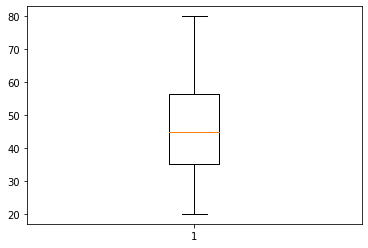

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(food_a)
plt.show()


>위의 사각형 박스는 1사분위에서 3사분의를 의미하며 가장 많은 데이터들을 분포되어 있다. 아래 위의 바는 최대값과 최소값을 의미하며 이 범위를 벗어나게 되면 이상치라고 표현한다.

##6. 이상치
>데이터가 기존 데이터와 많은 차이가 나는 것을 이상치라고 한다. 

>IQR의 1.5배 또는 3배의 차이가 나면 이상치라고 표현한다. IQR(Interquartile Range)는 다음과 같이 구할 수 있다.
* IQR = (3분위수 - 1분위수)

In [ ]:
dataset = pd.Series( [16, 21, 22, 23, 24, 25, 30] )

min = np.percentile(dataset, 0)
q1 = np.percentile(dataset, 25)
q2 = np.percentile(dataset, 50)
q3 = np.percentile(dataset, 75)
max = np.percentile(dataset, 100)

>percentile은 첫 번째 인자는 series 데이터를 두 번째 인자에는 퍼센트를 입력하여 위치값을 얻어 낼 수 있다. 사분위 수를 얻기 위해 25씩 증가하여 최소값부터 최대값까지 각 데이터를 얻었다.

In [ ]:
iqr = q3-q1
lowerfence = q1-iqr*1.5
upperfence = q3+iqr*1.5

lowerbar = dataset[dataset>lowerfence].min()
upperbar = dataset[dataset<upperfence].max()

>이상치는 3사분위수에서 1사분위수를 뺀 값에 1.5를 곱한 값이 이상치 발생 범위가 된다 위의 코드에서 이를 이용하여 최저한계치(lowerfence)와 최고한계치(upperfence)를 구한다. 이 범위를 벗어난 값들을 이상치로 판단하게 된다. 

>또한 각 경계는 최저한계치보다 큰 값 중에 가장 작은 값이 제일 아래 수평선이 되며 최고 한계치보다 작은 값 중 가장 큰 값이 제일 위 수평선이 된다.

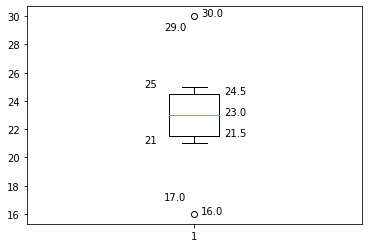

In [ ]:
plt.boxplot(dataset)
plt.text(0.91, lowerfence, lowerfence)
plt.text(0.85, lowerbar, lowerbar)
plt.text(1.02, min, min)
plt.text(1.09, q1, q1)
plt.text(1.09, q2, q2)
plt.text(1.09, q3, q3)
plt.text(0.85, upperbar, upperbar)
plt.text(0.91, upperfence, upperfence)
plt.text(1.02, max, max)
plt.show()

> 이 정보들을 이용하여 위와 같이 수치를 표현할 수 있다.위의 boxplot에서는 16과 30이 이상치임으로 이를 제거하고 나머지 정보로 분석을 진행해야 한다.

##7. 이상치 제거
> B 식당에서 600이라는 이상치가 발생했다. 이를 우선 boxplot으로 표현해 보자

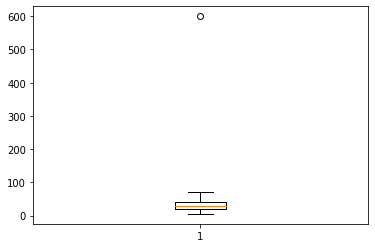

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(food_b)
plt.show()

>위와 같이 이상치가 나타나게 된다. 이를 제거하고 다시 boxplot을 표현해 보자

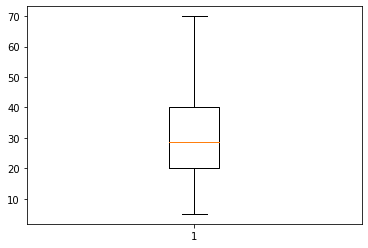

In [ ]:
foodB_Series = pd.Series(food_b)
foodB_Series = foodB_Series[foodB_Series<600]

plt.boxplot(foodB_Series)
plt.show()

>첫 번째 줄에서 600을 제거하기 위해 list형을 Series 형으로 변환시켰고 두 번째 줄에서 600보다 작은 값을 별도로 저장했다. 이 후 boxplot으로 출력하면 이전의 이상치가 사라지고 정상적인 데이터가 나타난 것을 볼 수 있다. 

>이상치의 제거 방법은 위와 같이 데이터를 배제시키는 것도 있지만 대표값으로 변환시키는 방법도 있다. 데이터가 부족한 경우 데이터를 삭제하게 되면 분석이 원활이 이루어지지 않을 수도 있음으로 대표값인 평균 혹은 중앙값으로 변환시킨다.


In [ ]:
foodB_Series = pd.Series(food_b)
# foodB_Series.describe()
# foodB_Series.describe().loc['mean']
foodB_Series[foodB_Series>40] =foodB_Series.describe().loc['mean']
foodB_Series[foodB_Series>40] =foodB_Series.describe().loc['50%']
foodB_Series

count     27.000000
mean      51.037037
std      110.789295
min        5.000000
25%       20.000000
50%       30.000000
75%       41.500000
max      600.000000
dtype: float64

>기존의 list 정보를 series 정보로 변환 시킨 후 평균값을 얻어 온다. 평균값은 이상치가 포함된 값이므로 사용하면 안되지만 테스트로 사분위수중 75%이상에만 적용하기 위해 40분이 넘은 곳에 평균값을 입력해 보자.

>평균값은 이상치가 포함되어 적용할 수 없음으로 중위값으로 변환시켜 적용해 보면 정상적인 값들이 들어가는 것을 볼 수 있다. 

>이를 이용하여 이상치 발생 데이터에 대해 중위값을 적용하는 프로그램을 작성해 보자

In [ ]:
foodB_Series = pd.Series(food_b)
q1 = foodB_Series.describe().loc['25%']
q3=foodB_Series.describe().loc['75%']
iqr = q3-q1
lowerfence = q1-iqr*1.5
upperfence = q3+iqr*1.5

medium = foodB_Series.describe().loc['50%']
foodB_Series[(foodB_Series>upperfence) | (foodB_Series<lowerfence)] = medium
foodB_Series


>최저한계치와 최고한계치를 구해서 이 범위를 벗어난 값은 중간값으로 대체한다. 여기서 두 가지 조건을 처리하기 위해 |(or) 연산을 적용했다.

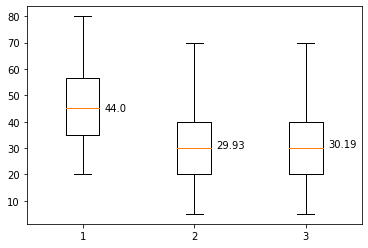

In [ ]:
food=[food_a, foodB_Series, food_c]

food_a_mean = round(np.mean(food_a), 2)
food_b_mean = round(np.mean(foodB_Series), 2)
food_c_mean = round(np.mean(food_c), 2)

plt.boxplot(food)
plt.text(1.2,food_a_mean , food_a_mean)
plt.text(2.2,food_b_mean , food_b_mean)
plt.text(3.2,food_c_mean , food_c_mean)

plt.show()


>위와 같이 세 삭당의 평균 배달 시간을 알아봤다. 결론적으로 B 식당이 좀더 신속하게 배달되는 것을 볼 수 있다.